In [1]:
#Import modules
%matplotlib inline
import numpy as np
import os.path
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib
import pandas as pd
import seaborn as sns


In [2]:
rate = pd.read_csv('./data/Rate.csv')
benefit= pd.read_csv('./data/BenefitsCostSharing.csv')
network=pd.read_csv('./data/Network.csv')
rules=pd.read_csv('./data/BusinessRules.csv')
attribute=pd.read_csv('./data/PlanAttributes.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [5]:
benefit.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [14]:
result=pd.merge(benefit,rate,how='inner',left_index=True, right_index=True)

In [24]:
result1=pd.merge(result,rules,how='inner',left_index=True, right_index=True)

In [28]:
result1.head()

,BenefitName,BusinessYear_x,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,CohabitationRule,RowNumber,MarketCoverage,DentalOnlyPlan
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Adopted Child,No;Foster Child,No;War...",14,NaN,NaN
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Not Applicable,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Adopted Child,Yes;Foster Child,Yes;Stepson or ...",15,NaN,NaN
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Not Applicable,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Adopted Child,Yes;Foster Child,Yes;Stepson or ...",16,NaN,NaN
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Adopted Child,No;Foster Child,No;War...",17,NaN,NaN
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Adopted Child,No;Foster Child,No;War...",18,NaN,NaN


In [16]:
result.isnull().sum()

BenefitName                                        0
BusinessYear_x                                     0
CoinsInnTier1                                1113847
CoinsInnTier2                                4571587
CoinsOutofNet                                1113847
CopayInnTier1                                1113847
CopayInnTier2                                4571587
CopayOutofNet                                1113849
EHBVarReason                                 3020737
Exclusions                                   4572247
Explanation                                  4075700
ImportDate_x                                       0
IsCovered                                     215980
IsEHB                                        1817362
IsExclFromInnMOOP                             983986
IsExclFromOonMOOP                             982626
IsStateMandate                               4250463
IsSubjToDedTier1                             2465877
IsSubjToDedTier2                             2

In [10]:
#result.dropna()

,BenefitName,BusinessYear_x,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber_y


In [63]:
ortho=result1[(result1['BenefitName'] == 'Orthodontia - Adult') | (result1['BenefitName'] == 'Basic Dental Care - Child') | (result1['BenefitName'] == 'Routine Dental Services (Adult)')| (result1['BenefitName'] == 'Basic Dental Care - Adult')| (result1['BenefitName'] == 'Major Dental Care - Adult')| (result1['BenefitName'] == 'Major Dental Care - Child')]

In [64]:
ortho.head()

,BenefitName,BusinessYear_x,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,CohabitationRule,RowNumber,MarketCoverage,DentalOnlyPlan
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Adopted Child,No;Foster Child,No;War...",14,NaN,NaN
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Not Applicable,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Adopted Child,Yes;Foster Child,Yes;Stepson or ...",16,NaN,NaN
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Adopted Child,No;Foster Child,No;War...",18,NaN,NaN
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Grandson or Granddaughter,Yes;Adopte...",10,NaN,NaN
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,3 or more,No,No,Age on effective date,Not Applicable,"Brother or Sister,Yes;Ward,Yes;Self,Yes;Child,...",11,NaN,NaN


In [65]:
from datetime import datetime, date

In [66]:
ortho['Date'] = pd.to_datetime(ortho.ImportDate_x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
e=[]
for i in ortho['Date']:  
    #print(i.year)
    a=str(i.year)
    b=str(i.month)
    c=str(i.day)
    d=a+'/'+b+'/'+c
    e.append(pd.to_datetime(d))
e

[Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2014-03-

In [68]:
rate_dictionary={
    'Date':e,
    'Rate':list(ortho.IndividualRate)
}
rate_df=pd.DataFrame(rate_dictionary)


rate_df.head()

,Date,Rate
0,2014-03-19,29.00
1,2014-03-19,36.95
2,2014-03-19,32.00
3,2014-03-19,36.95
4,2014-03-19,32.45


In [87]:
rate_df.head(5)

,Date,Rate
0,2014-03-19,29.00
1,2014-03-19,36.95
2,2014-03-19,32.00
3,2014-03-19,36.95
4,2014-03-19,32.45


In [88]:
rate_df.groupby('Date').mean().head()

,Rate
Date,
2013-06-04,44.590833
2013-06-06,300300.257167
2013-08-01,37.556111
2013-09-02,318.086736
2013-09-10,801427.027179


In [89]:
R=rate_df.groupby('Date').mean()

In [95]:
R.Rate

Date
2013-06-04        44.590833
2013-06-06    300300.257167
2013-08-01        37.556111
2013-09-02       318.086736
2013-09-10    801427.027179
2013-09-16        18.129306
2013-09-17        96.911667
2013-10-15        95.938542
2014-01-16    169813.658642
2014-01-17    546032.065201
2014-01-21     17813.368505
2014-03-19        16.706515
2014-04-18       588.223675
Name: Rate, dtype: float64

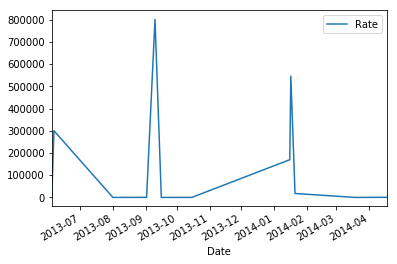

In [72]:
R.plot()

<h2><a id="C">Time Series Forecasting Methods</a></h2>

In [90]:
from statsmodels.tsa.arima_model import ARIMA

In [91]:
R

,Rate
Date,
2013-06-04,44.590833
2013-06-06,300300.257167
2013-08-01,37.556111
2013-09-02,318.086736
2013-09-10,801427.027179
2013-09-16,18.129306
2013-09-17,96.911667
2013-10-15,95.938542
2014-01-16,169813.658642


In [101]:
train = R['2013': '2014']
test = R['2014']

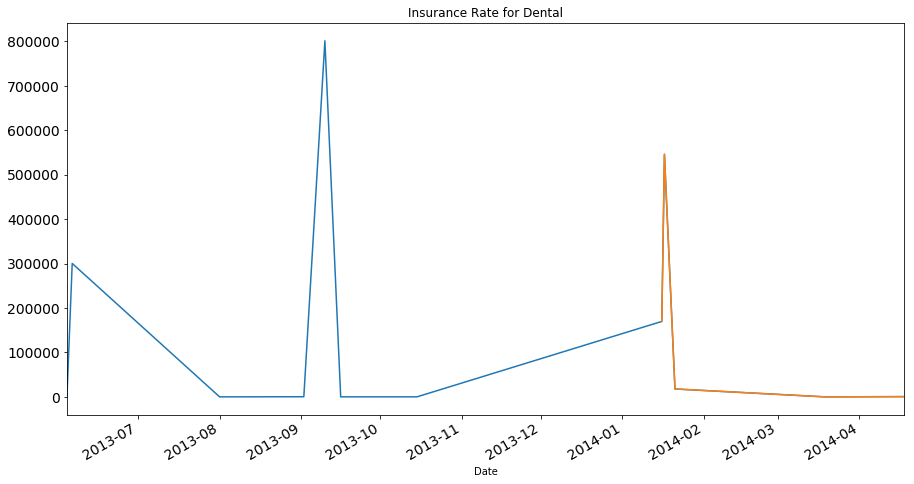

In [103]:
train.Rate.plot(figsize=(15,8), title= 'Insurance Rate for Dental', fontsize=14)
test.Rate.plot(figsize=(15,8), title= 'Insurance Rate for Dental', fontsize=14)
plt.show();

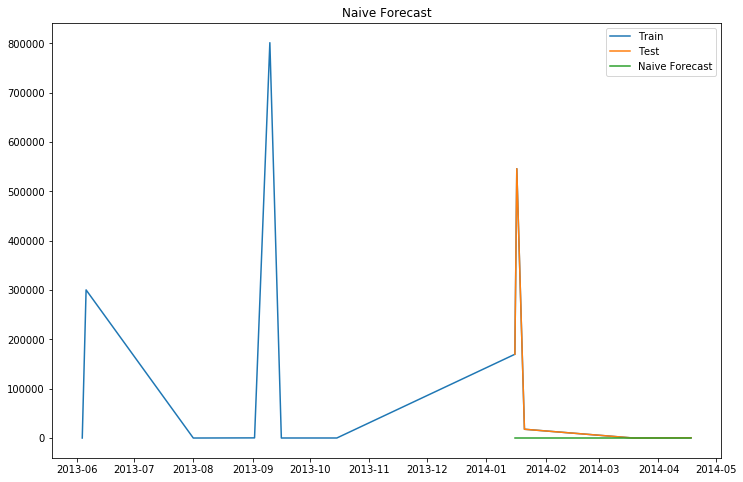

In [104]:
dd= np.asarray(train.Rate)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Rate'], label='Train')
plt.plot(test.index,test['Rate'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show();

In [105]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Rate, y_hat.naive))
print(rms)

255516.44344132545


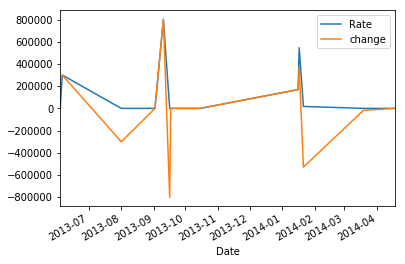

In [123]:
R['change'] = R.Rate.diff(1);
R.plot();

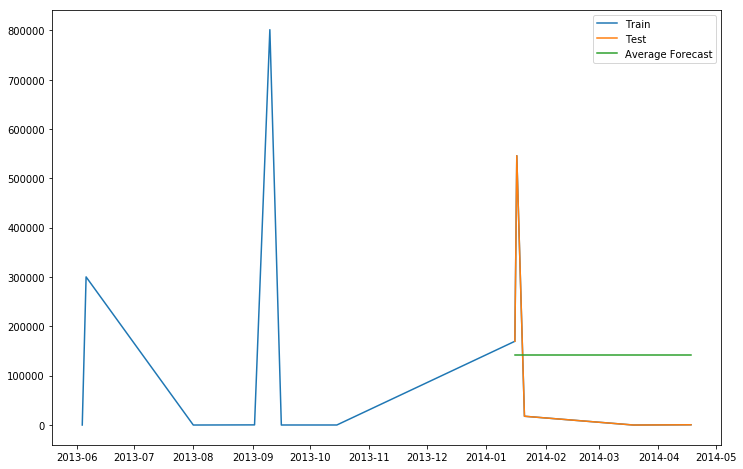

In [124]:
#Method 2
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Rate'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show();

In [128]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.avg_forecast))
print(rms)

209586.29142864043


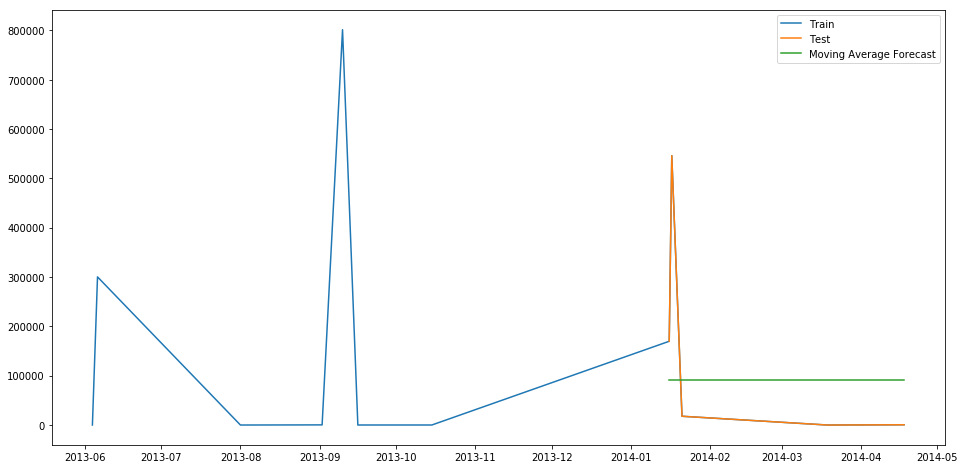

In [129]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Rate'].rolling(8).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show();

In [130]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.moving_avg_forecast))
print(rms)

216622.03112001249


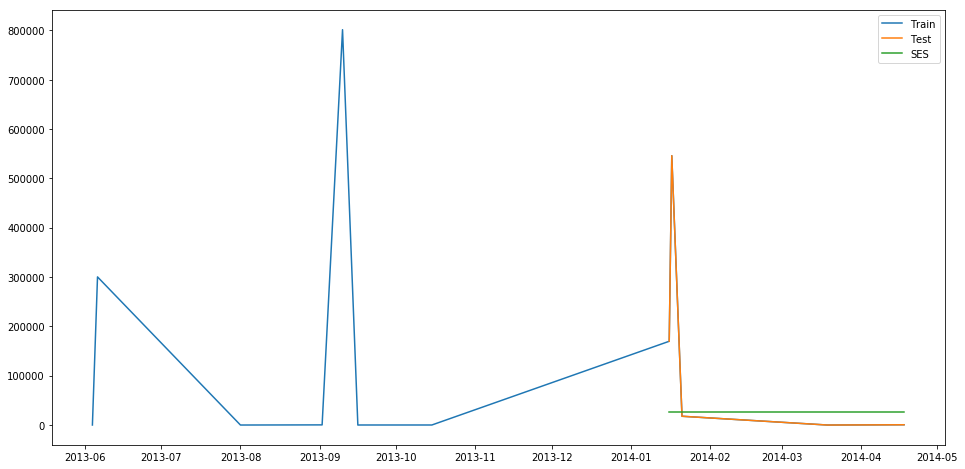

In [131]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Rate'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show();

In [132]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.SES))
print(rms)

241885.9298794542


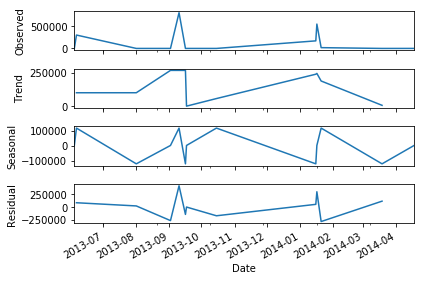

In [134]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Rate, freq=3).plot()
plt.show();

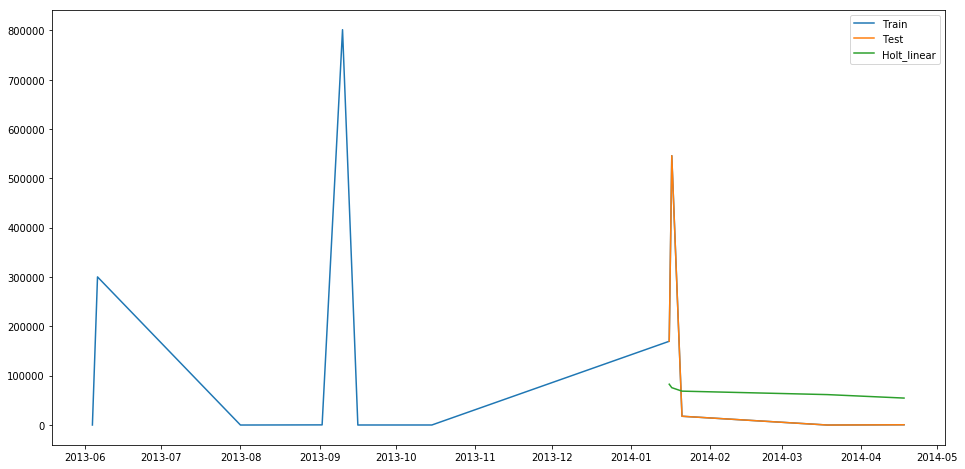

In [135]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Rate'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show();

In [136]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.Holt_linear))
print(rms)

218205.82265109848


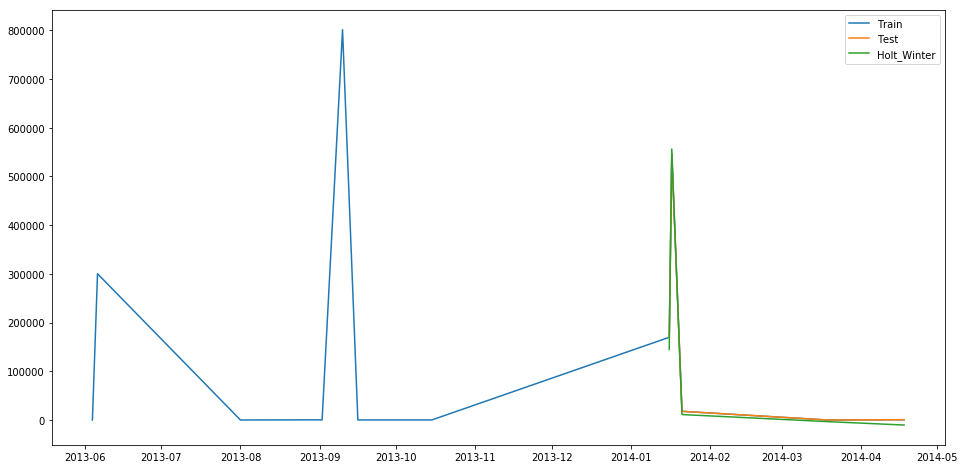

In [140]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Rate']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [141]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.Holt_Winter))
print(rms)

13443.534346299868


In [144]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['Rate'], order=(2, 1, 4),seasonal_order=(0,1,1,2)).fit()
y_hat_avg['SARIMA'] = fit1.predict( start="2012-01-06", end="2012-10-26", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: maxlag should be < nobs

In [109]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Rate).plot()
plt.show();

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [122]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['Rate'], order=(0,0,0),seasonal_order=(1,0,0,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict( start="2014-01-17", end="2014-04-18", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'